<img   src="../figuras/logo/TalentQ_LogoPosNegro.png" align=center  width="120"/>
<br>

<table width="100%">
<td style="font-size:45px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
Circuitos para computación clásica
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [1]:
%run ../macro_CURSO.py

- [Preparación de un estado inicial](#prepainit)


- [Computación Clásica Universal](#compclas)


- [Funciones digitales](#funcdigit)


- [Oráculos <i> booleanos </i> y de fase](#oracles)

<a id="prepainit"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Preparación de un estado inicial</b>
</table>


Un problema fundamental, aun abierto en computación cuántica es decubrir qué clases especiales de operadores $U$ admiten una descomposición eficiente en término de un número polinómico en la dimensión de $U$ de puertas elementales. 

Vamos a ver una clase de problemas que admite los dos extremos: máxima eficiencia y no-eficiencia.

La preparación de un estado inicial debe ser realizada por un circuito que pre-procese la operación
$$
U \ket{0} \to \ket{\psi} = \sum_{i=1}^n c_i\ket{i}
$$
Separemos las amplitudes complejas en módulo y fase $c_i = a_i e^{\gamma_i}$ donde $a_i = |c_i|$.   

En general debemos fijar un *número exponencial* de parámetros, por lo que el circuito será *no-eficiente*.

Veamos el caso $n=2$. El circuito que nos permite preparar este estado es el siguiente

<br>
<br>
<div>
<img src="images/preparestatecircuit.png" width="62%" style='margin:auto'/>
</div>
<br>

Donde 
$$
D(\gamma_i,\gamma_j ) = \begin{bmatrix} \gamma_i & 0 \\ 0 & \gamma_j \end{bmatrix} = K(\gamma_j) P(\gamma_i-\gamma_j)
$$

A la salida de este circuito el estado será, en la barrera

\begin{eqnarray}
\ket{\psi_0} &=& \cos\theta_1 \ket{0}\otimes \big( \cos\theta_2 \ket{0} + \sin\theta_2\ket{1}\big) + \sin\theta_1\ket{1}\otimes \big(\cos\theta_3\ket{0} + \sin\theta_3\ket{1}\big) \nonumber\\&=& \cos\theta_1 \cos\theta_2 \ket{00} + \cos\theta_1\sin\theta_2\ket{01} + \sin\theta_1\cos\theta_3\ket{10} + \sin\theta_1\sin\theta_3\ket{11} \rule{0mm}{10mm}
\end{eqnarray}

Obtenemos cuatro ecuaciones para cuatro incógnitas
\begin{eqnarray}
a_1 &=& \cos\theta_1 \cos\theta_2 \nonumber\\
a_2 &=&  \cos\theta_1\sin\theta_2\nonumber\\
a_3 &=&  \sin\theta_1\cos\theta_3\nonumber\\
a_4 &=& \sqrt{1-a_1^3-a_2^2-a_3^2}
\end{eqnarray}

Vemos que sólo necesitamos 3 grados de libertad para representar 4 amplitudes con una ligadura $\sum_i a_i^2 = 1$.


Una vez fijadas las amplitudes, la última parte del circuito es equivalente al  operador unitario

$$
U=\ket{0}\bra{0}D(\gamma_1,\gamma_2) + \ket{1}\bra{1}D(\gamma_3,\gamma_4)  =\begin{pmatrix} K(\gamma_1)P(\gamma_2-\gamma_1) & 0 \\ 0 &K(\gamma_3) P(\gamma_4-\gamma_3) \end{pmatrix} = \begin{pmatrix} e^{i\gamma_1} & 0 & 0 & 0 \\ 0 & e^{i\gamma_2} & 0 & 0 \\ 0 & 0 & e^{i\gamma_3} & 0 \\ 0 & 0 & 0 & e^{i\gamma_4} \end{pmatrix}
$$


<div class="alert alert-block alert-success">
    <b>Ejercicio 1.3.1.5</b> 

    
Diseña el circuito que inicializa un estado genérico de $n=3$ cúbits. Úsalo para introducir el estado

$$
\ket{\psi} = \frac{1}{4}\left( \rule{0mm}{5mm} \ket{000}-3\ket{001}-\ket{010}+\ket{011} + \ket{100}+2\ket{110}-\ket{111} \right)
$$
    
</i>.
</div>


Es importante destacar que, en algunos casos, sí que es posible encontrar un circuito eficiente. 

Por ejemplo el estado inicial que es una superposición homogénea de elementos de la base

$$
\ket{\psi} = \frac{1}{\sqrt{n}}\sum_{i=1}^n \ket{i} = W \ket{0}
$$

se obtiene en un solo paso, mediante la aplicación de la puerta de Walsh-Hadamard $W = H^{\otimes n}$.

<a id="compclas"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b> Computación clásica universal </b>
</table>

En computación clásica, la únidad de información es el bit, una variable entersa $x = 0,1 \in {\mathbb Z}_2$. Las puertas lógicas elementales son, sobre un bit, la puerta NOT $x\to \neq x = x\oplus 1$, sobre dos bits
las puertas AND, OR, XOR, y NAND 

$$
\begin{array}{|c|c|c|c|c|}
\hline x,y & \hbox{AND} ~ (x\land y)  & \hbox{OR} ~  (x \lor y) & \hbox{XOR} ~ (x\oplus y) & \hbox{NAND} ~ \neg(x\land y)\\
\hline 00 & 0 &  0 &   0 & 1 \\
\hline 01 & 0 &  1 &  1 & 1\\
\hline 10 & 0 &  1 &  1 & 1\\
\hline 11 & 1 &  1 &  0 & 0 \\
\hline 
\end{array}
$$

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
cualquier función
<br>$$
f : \{0,1\}^n \to \{0,1\}^m
$$
<br> puede construirse mediante una concatenación de puertas elementales NOT, AND, OR y XOR.
</div>



Surge la cuestión acerca de si la computación cuántica podrá ser, al menos equivalente a la clásica actuando sobre simples cúbits $\{\ket{0},\ket{1}\}$ (sin superposiciones)

Claramente, la operacion NOT es idéntica a las puerta cuántica X.


 

Con respecto a las operaciones sobre *dos bits*, nos encontramos con una
dificultad: las puertas cuánticas son unitarias y, por tanto, reversibles. 

Sin embargo las puertas clásicas de son funciones del espacio de 2 bits a 1 bit. Por esta razón, *ninguna de estas operaciones es invertible*

Sin embargo si mantenemos memoria del primer registro, $x$ la función XOR se vuelve invertible

$$ \hbox{XOR} : ( 00,01,10,11) \to  (00, 01, 11, 10 )$$

No así las demás, que necesitan incluir un bit extra (auxiliar).   Este formalismo extendido,  denominado *computación clásica reversible*,  admite una implementación en términos de puertas cuánticas unitarias.


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
Todas las puertas lógicas clásicas  NOT, AND, OR, XOR  y   NAND admiten una implementación en un circuito cuántico en términos de  la puerta de Toffoli (CCNOT)
</div>



A continuación se describe dicha implementación. Los 3 cúbits sobre los que actúa CCNOT tienen distintas funciones:

 1-  la entrada de los 2 primeros  cúbits ha de *prepararse* en  2 bits fijos dependientes del caso 

2-  la salida del tercer cúbit  incorpora el bit resultante de la operación clásica.




- La implementación de $\hbox{NOT}$
<br>
<br>
$$
\hbox{NOT}   ~\to~  {\rm CCNOT} \ket{1,1,x} = \ket{1,1,\neg x }
$$
<br>
 es inmediata porque ${\rm CCNOT}$ aplicado a $\ket{1,1,x}$ necesariamente actúa como $X$ en el tercer bit. 


-  La implementación de $\hbox{AND}$ 
<br>
<br>
$$  {\rm AND}  ~\to~ {\rm CCNOT} \ket{x,y,0} = \ket{x,y, x  \land y} $$
<br>
<br>
 es directamente la acción de la puerta CCNOT

- La implementación de $\hbox{OR}$ se basa en el *teorema de Morgan*:
$
x\lor y = \neg(\neg x\land \neg y)\, .
$ De esta manera
<br>
<br>
<br>
$$
{\rm OR} ~\to~  (X\otimes X\otimes X){\rm CCNOT} (X\otimes X \otimes I) \ket{x,y,0} = \ket{x,y, x \lor y}
$$
<br>
<br>
y el producto de operadores ejecuta la instrucción indicada en el miembro de la derecha.


<br>

- La implementación de $\hbox{XOR}$ 
<br>
$$
{\rm XOR} ~\to~ {\rm CCNOT} \ket{1,x,y} = \ket{1,x, x \oplus y}
$$
<br>
 se basa en que, actuando sobre $\ket{1, x, y}$ ${\rm CCNOT}$ se reduce a ${\rm CNOT}$ actuando sobre $\ket{x,y}$, que es precisamente $\ket{x,x\oplus y}$.


<br>

- La implementación de $\hbox{NAND}$ 
<br>
<br>

$$
{\rm NAND} ~\to~  (I\otimes I\otimes X) {\rm CCNOT}  \ket{x,y, 0} =  \ket{x,y, \neg (x \land y)}  
$$
<br>



<a id="fundigit"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b> Funciones digitales </b>
</table>

<br>

Una clase de problemas en los que la computación cuántica promete alcanzar una ventaja con respecto a la clásica involucra la obtención de propiedades de funciones.  

Un problema típico es adivinar si una función es de una clase o de otra dentro de unas posibilidades. Genéricamente se trata de un problema exponencial.

<br>


<br>

El objeto de estudio son  *funciones clásicas* de las que, lo único que nos está permitido es *evaluarlas*. Por tanto estas funciones son como cajas negras llamadas **oráculos** que invocamos tantas veces como se desee.

<br>

<br>

Para poder poner a prueba un algoritmo es necesario poder introducir dichas funciones en los circuitos.

Por tanto, es crucial aprender a codificar funciones digitales clásicas.

<br>


Un proceso de computación clásica descompone en puertas elementales una _función digital_ 
<br>
<br>

$$
f : \{0,1\}^m ~~\to ~~\{0,1\}^n
$$

<br>

<br>

La construcción de $f$ es equivalente a la especificación de $n$ funciones  $f_1,f_2,...,f_n$ **binarias**
<br>
<br>

$$
f_i : \{0,1\}^m ~~\to ~~\{0,1\}
$$ 
<br>

Es evidente que ninguna función binaria es invertible para $m\geq 2$. 

<br>

 
 El teorema de *Universalidad de la Computación Clásica* afirma que cualquier función binaria $f_i$ puede reducirse a la acción de puertas elementales AND, OR, NOT y FANOUT. De estas últimas, solo NOT es reversible. Las demas no. Por ejemplo
<br>
<br>

|bit 1|bit 2||OR|
|---|---||---|
|0|0||0|
|0|1||1|
|1|0||1|
|1|1||1|

<br>

<br>

Si queremos englobar la computación clásica dentro de la cuántica, este hecho representa un inconveniente, debido a que los circuitos cuánticos son, por naturaleza invertibles. 



<br>

Ello es debido que  cada circuito representa la acción un operador unitario, para el cual, la inversa existe y es igual al operador adjunto.

$$
U^{-1} = U^{\dagger}
$$


<br>

La manera más robusta de fabricar, a partir de un mapa no invertible $f$, otro invertible $f\to U_f$ consiste en conservar los valores de la variables iniciales junto con el resultado.  

<br>

<br>

Si en lugar de bits, tratamos con cúbits, 
 necesitamos un total de $n+1$ bits. Es decir, debemos tomar dos registros cuánticos: uno que consta de los $n$ cúbits que contienen el argumento de la función, $\ket{x} \in \mathbb{C}^n$, y otro con un único cúbit que guardará el resultado, $\ket{y} \in \mathbb{C}$.

<br>



\begin{equation}
U_f : \ket{x}\ket{y} \longrightarrow \ket{x} \ket{ y \oplus f(x) }
\end{equation}

<br>

Donde $\oplus$ indica suma módulo 2. De hecho, es evidente de la definición que $U_f\cdot U_f = I$. 

## Construcción de funciones binarias. Los min-términos

Es muy sencillo establecer un método general para construir funciones binarias de la forma $f: \{0, 1\}^n \rightarrow \{0, 1\}$. Consideremos la siguiente tabla de verdad para una función $f: \{0, 1\}^3 \rightarrow \{0, 1\}$ concreta.

|$$x_1$$|$$x_2$$|$$x_3$$||$$f$$|
|-|-|-||-|
|0|0|0||0|
|0|0|1||1|
|0|1|0||0|
|0|1|1||0|
|1|0|0||0|
|1|0|1||1|
|1|1|0||0|
|1|1|1||1|



La idea es considerar exclusivamente los términos que tienen como salida la variable 1, que denominaremos <b>min-términos</b>. 

Por ejemplo hay un min term de la forma $101 \to 1$ que se puede obtener mediante una puerta como la siguiente

<br>
<br>
<div>
<img src="images/ctrl5.png" width="10%" style="margin:auto"/>
</div>
<br>

Cada min-término llevará asociada una puerta condicionada diferente. Su composición define la función $f$

Para el caso de la tabla de verdad anterior, el circuito correspondiente vendrá dado por:

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

donde hemos hecho uso de la puerta multicontrolada [MCXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html?highlight=mcxgate#qiskit.circuit.library.MCXGate) de qiskit

Vamos a implementar una función $f:\{0,1\}^4\to \{0,1\}^4$ dada por la siguiente tabla de valores 

    
|$$x$$|$$f(x)$$||$$x$$|$$f(x)$$|
|---|---||---|---|
|0000|1111||1000|0101|
|0001|1011||1001|0100|
|0010|0011||1010|0000|
|0011|1000||1011|1110|
|0100|0101||1100|1111|
|0101|0100||1101|1011|
|0110|0000||1110|0011|
|0111|1110||1111|1000|


Observa en que en $f: \{0,1\}^n\to \{0,1\}^m $ hay $2^n$ valores de $f$


<div class="alert alert-block alert-success">
    <b>Ejercicio 1.3.2.1</b> 

Completa la el código que genera un circuito que implementa la siguiente función digital

<details>
    <summary><p style='text-align:right'> >> Solución </p></summary>
    
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[j]])

</details>
</div>

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import MCXGate


def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))
    
    fbits = len(f_outputs[0])
    
    #generamos todos los posibles inputs en binacio, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
    # verificamos que hay tantos outputs como posibles inputs 
    assert len(inputs) == len(f_outputs)

    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(fbits, name='output')
    cr = ClassicalRegister(fbits)
    qc = QuantumCircuit(qr_input, qr_output,cr, name='q')


    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::-1],2)

        # Para cada input, i, haz un bucle sobre cada  cúbit del output     
        for j,output_bit in enumerate(f_outputs[i]):
###
#        escribe tu código aquí
#        cuando el bit del output es '1' tenemos un min-term. Aplica la puerta correspondiente 
#  
###
    qc.barrier()
    qc.measure(qr_output,cr)

    return qc

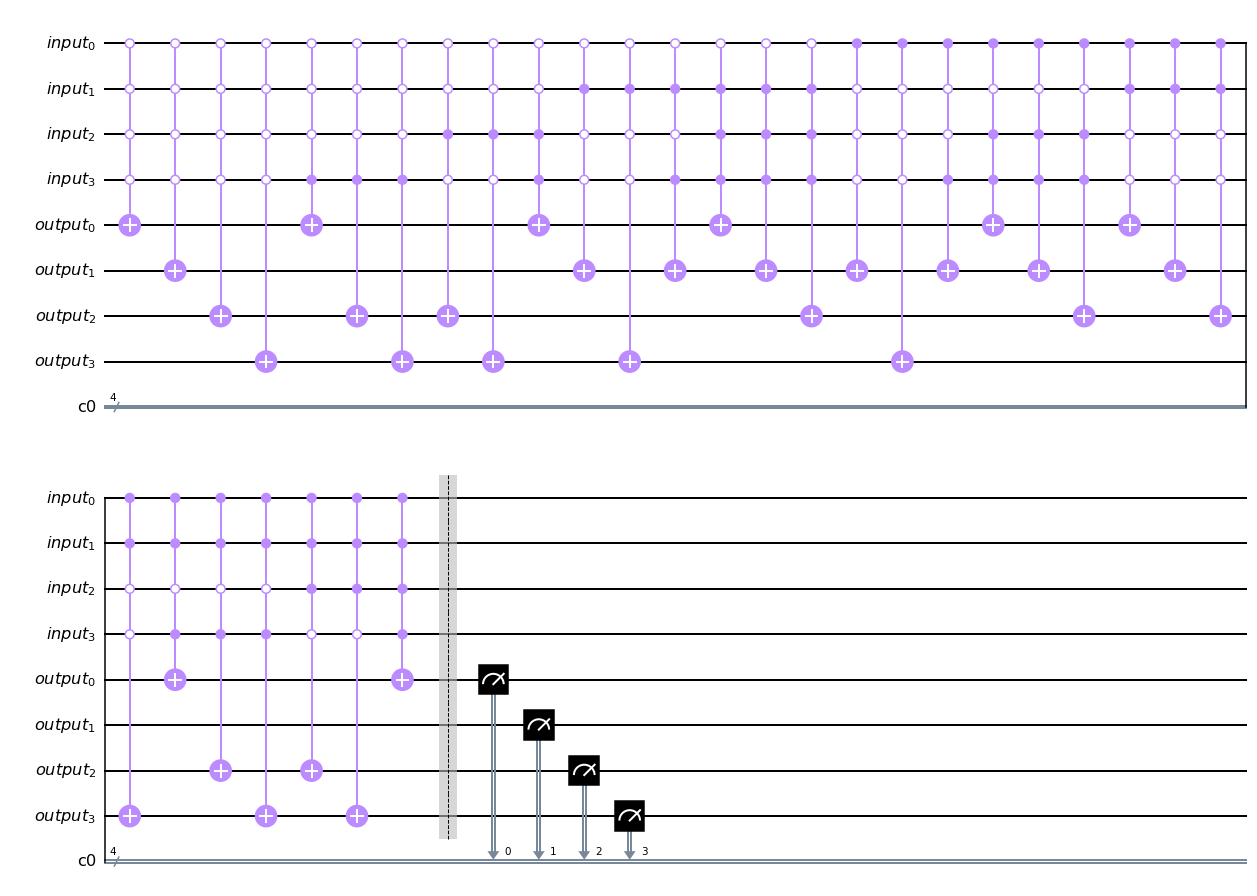

In [6]:
 
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

    
circuit = oracle(f_outputs)
circuit.draw('mpl')

<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.2 </b>
       
Escribe una función $f:S^n\to S$  que admita cadenas de $n$ bits, $x = x_{n-1}\ldots x_0$  y produzca de forma aleatoria $f(x) = \pm 1$ de equilibradamente (es decir, tantos $+1$ como $-1$). 

</div>


### Funcion binaria lineal: 

Dados dos n-tuplas binarias $x=(x_{n-1},\ldots,x_0)$ y $a=(a_{n-1},\ldots,a_0)$ definimos la **función lineal**
<br>
        
\begin{equation}
f(x;a) = a \cdot x = a_{n-1} x_{n-1} \oplus a_{n-2} x_{n-2} \oplus \cdots \oplus a_{0} x_{0}\; ,
\end{equation}

<br>
donde  $\oplus$ es la suma módulo 2.


El circuito que implementa esta función es el siguiente

<br>
<br>

<div>
<img src="images/linear_function.png" width="35%" style="margin:auto"/>
</div>
<br>


<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.3 </b>
       

 Completa el siguiente código que realiza la suma para $a=110110$. Para ello, fíjate en que esta implementación consiste en inicializar el sistema en el estado binario definido por $x$ e implementar una puerta CNOT para cada bit de $a$ que sea 1.
    
    
<details>
<summary><p style='text-align:right'> >> Solución </p></summary>
    
    for i, aq in enumerate(str(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 

</details>
</div>


In [7]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

def linear_circuit(x,a):
       
    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')

    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(str(x)):
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
###
#
#        Tu solución aquí
#
#
####
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

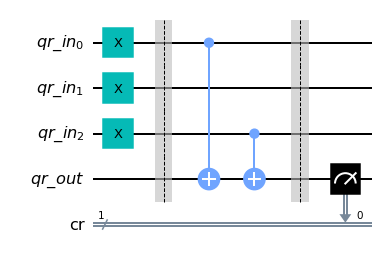

In [8]:
a_string = '1011'

x_string = '1001'

qc=linear_circuit('111','101')
qc.draw('mpl')

La función $a\cdot x = (1 + 0 + 0 + 1)mod(2) = 0$. Vamos a ver si este resultado es el hallado

In [ ]:
from qiskit import Aer, execute

M_backend = Aer.get_backend('qasm_simulator')
counts     = execute(qc, M_backend).result().get_counts()

from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.4</b>

sea sobre el conjunto de valores $x\in \{0,1,2,3\}$ la función $f(x) = x^2$. Halla la tabla de verdad en binario y construye el oráculo que implementa esta función.
    
</div>

<a id="oracles"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
        <b>Oráculos <i> booleanos </i> y de fase</b>
</table>

En la sección anterior hemos codificado la salida de la función binaria $f(x)\in [0,1]$ en un cúbit ancilla

$$
U_f \ket{x}\otimes\ket{y} = \ket{x}\ket{y + f(x)}
$$

donde hemos situado la ancilla en $\ket{y} = \ket{0}$.


### Oráculo *booleano*

Especificando $y=0$ codificamos la función $f(x)$ directamente en el estado del segundo cúbit

$$
U_f \ket{x}\otimes\ket{0} = \ket{x}\ket{f(x)}
$$

Oráculos basados en esta codificación se denominan *booleanos*

### Oráculo de fase


Nada nos impide inicializar la ancilla en un autoestado $U_f$

En particular sabemos que los autovalores deben ser $\pm 1$ dado que $U_f^2 = I$. Los autovectores son los elementos $\ket{\pm}$  de la base de autoestado de $X$



Veamos cada caso
\begin{eqnarray}
U_f\ket{x}\otimes \ket{+} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{5mm}\ket{0+f(x)}+\ket{1+f(x)} \right) = \ket{x}\otimes \ket{+} \nonumber\\
U_f\ket{x}\otimes \ket{-} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{5mm} \ket{0+f(x)}-\ket{1+f(x)}\right) = (-1)^{f(x)} \ket{x}\otimes \ket{-}
\end{eqnarray}

donde vemos que se produce un típico efecto de *retroceso de fase*


Como vemos, el valor de $f(x)$ ha quedado plasmado en la fase $(-1)^{f(x)}$.

Oráculos basados en esta codificación se denominan *oráculos de fase*